<h1>Author: Iptihal Yousri Ibrahim</h1>
<h3>The Sparks Foundation Task_5 : Explority Data Analysis - Sports</h3>
<h4>Perform EDA on Indian premiar leage dataset</h4>

<h3>Loading Packages and Data</h3>

In [1]:
import numpy as np
import plotly as pt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_matches = pd.read_csv('matches.csv')
df_deliveries = pd.read_csv('deliveries.csv')

<h3>EDA ( Exploratory Data Analysis )</h3>

<h4>For '' matches '' file</h4>

In [3]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


Full summary of the dataframe

In [4]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

Dataset Statistical Information Display

In [5]:
df_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


Find the fatures dtypes

In [6]:
df_matches.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

Shape of the data

In [7]:
df_matches.shape

(756, 18)

Check Null Values

In [8]:
df_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

the data have too much missing values in the column **umpire3** so we will drop this column

In [9]:
df_matches.drop(columns='umpire3', inplace=True)

**city, winner, player_of_match, umpire1, umpire2** has a litle mising values so will drop the rows with the missing values

In [10]:
df_matches.dropna(axis=0, inplace=True)

In [11]:
df_matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

Check Duplications

In [12]:
df_matches.duplicated().any()

False

return Series with number of distinct observations over requested axis

In [13]:
df_matches.nunique()

id                 743
season              12
city                32
date               538
team1               15
team2               15
toss_winner         15
toss_decision        2
result               2
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               40
umpire1             61
umpire2             65
dtype: int64

In [14]:
df_matches['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          63
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          13
Centurion          12
Ahmedabad          12
Visakhapatnam      12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [15]:
df_matches['team1'].value_counts()

Mumbai Indians                 99
Kings XI Punjab                91
Chennai Super Kings            88
Kolkata Knight Riders          82
Royal Challengers Bangalore    81
Delhi Daredevils               70
Rajasthan Royals               67
Sunrisers Hyderabad            60
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  14
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Delhi Capitals                  6
Name: team1, dtype: int64

In [16]:
df_matches['team2'].value_counts()

Kolkata Knight Riders          95
Royal Challengers Bangalore    93
Delhi Daredevils               86
Mumbai Indians                 85
Kings XI Punjab                84
Rajasthan Royals               77
Chennai Super Kings            74
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  25
Gujarat Lions                  16
Delhi Capitals                  9
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: team2, dtype: int64

In [17]:
df_matches['toss_winner'].value_counts()

Mumbai Indians                 96
Kolkata Knight Riders          91
Chennai Super Kings            89
Kings XI Punjab                80
Delhi Daredevils               79
Royal Challengers Bangalore    78
Rajasthan Royals               77
Sunrisers Hyderabad            45
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                  9
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [18]:
df_matches['toss_decision'].value_counts()

field    455
bat      288
Name: toss_decision, dtype: int64

In [19]:
df_matches['result'].value_counts()

normal    734
tie         9
Name: result, dtype: int64

In [20]:
df_matches['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings             98
Kolkata Knight Riders           92
Royal Challengers Bangalore     82
Kings XI Punjab                 81
Rajasthan Royals                75
Delhi Daredevils                66
Sunrisers Hyderabad             56
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                   9
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [21]:
df_matches['player_of_match'].value_counts()

CH Gayle           21
AB de Villiers     20
RG Sharma          17
DA Warner          17
MS Dhoni           17
                   ..
NV Ojha             1
KM Jadhav           1
AC Voges            1
AA Jhunjhunwala     1
S Hetmyer           1
Name: player_of_match, Length: 226, dtype: int64

In [22]:
df_matches['venue'].value_counts()

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   70
Feroz Shah Kotla                                        66
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

In [23]:
df_matches['umpire1'].value_counts()

HDPK Dharmasena    70
Asad Rauf          51
S Ravi             49
AK Chaudhary       43
Aleem Dar          36
                   ..
Nanda Kishore       1
SJA Taufel          1
A Nanda Kishore     1
SL Shastri          1
Sundaram Ravi       1
Name: umpire1, Length: 61, dtype: int64

In [24]:
df_matches['umpire2'].value_counts()

C Shamshuddin            57
S Ravi                   55
SJA Taufel               54
RJ Tucker                37
CK Nandan                36
                         ..
Subroto Das               1
JD Cloete                 1
Nand Kishore              1
KN Ananthapadmanabhan     1
Ian Gould                 1
Name: umpire2, Length: 65, dtype: int64

**Visualizations**

Univariate Analysis

>Check outliers

<AxesSubplot:xlabel='season'>

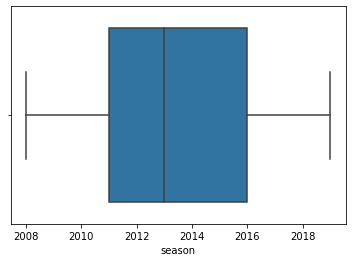

In [25]:
sns.boxplot(df_matches['season'])

<AxesSubplot:xlabel='win_by_runs'>

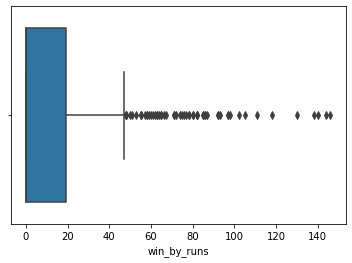

In [26]:
sns.boxplot(df_matches['win_by_runs'])

<AxesSubplot:xlabel='win_by_wickets'>

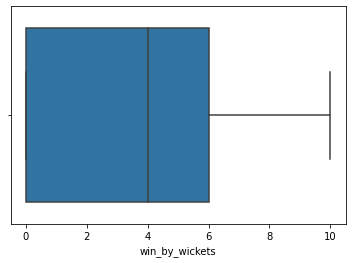

In [27]:
sns.boxplot(df_matches['win_by_wickets'])

<AxesSubplot:xlabel='season', ylabel='Density'>

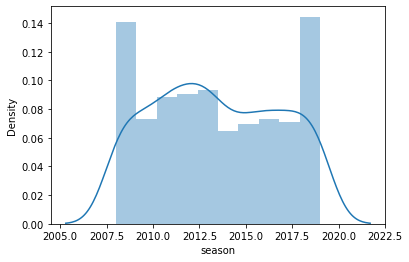

In [28]:
sns.distplot(df_matches['season'])

<AxesSubplot:xlabel='win_by_runs', ylabel='Density'>

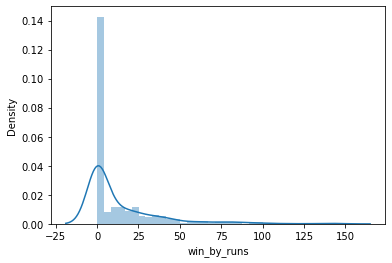

In [29]:
sns.distplot(df_matches['win_by_runs'])

<AxesSubplot:xlabel='win_by_wickets', ylabel='Density'>

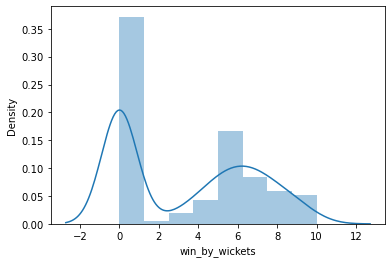

In [30]:
sns.distplot(df_matches['win_by_wickets'])

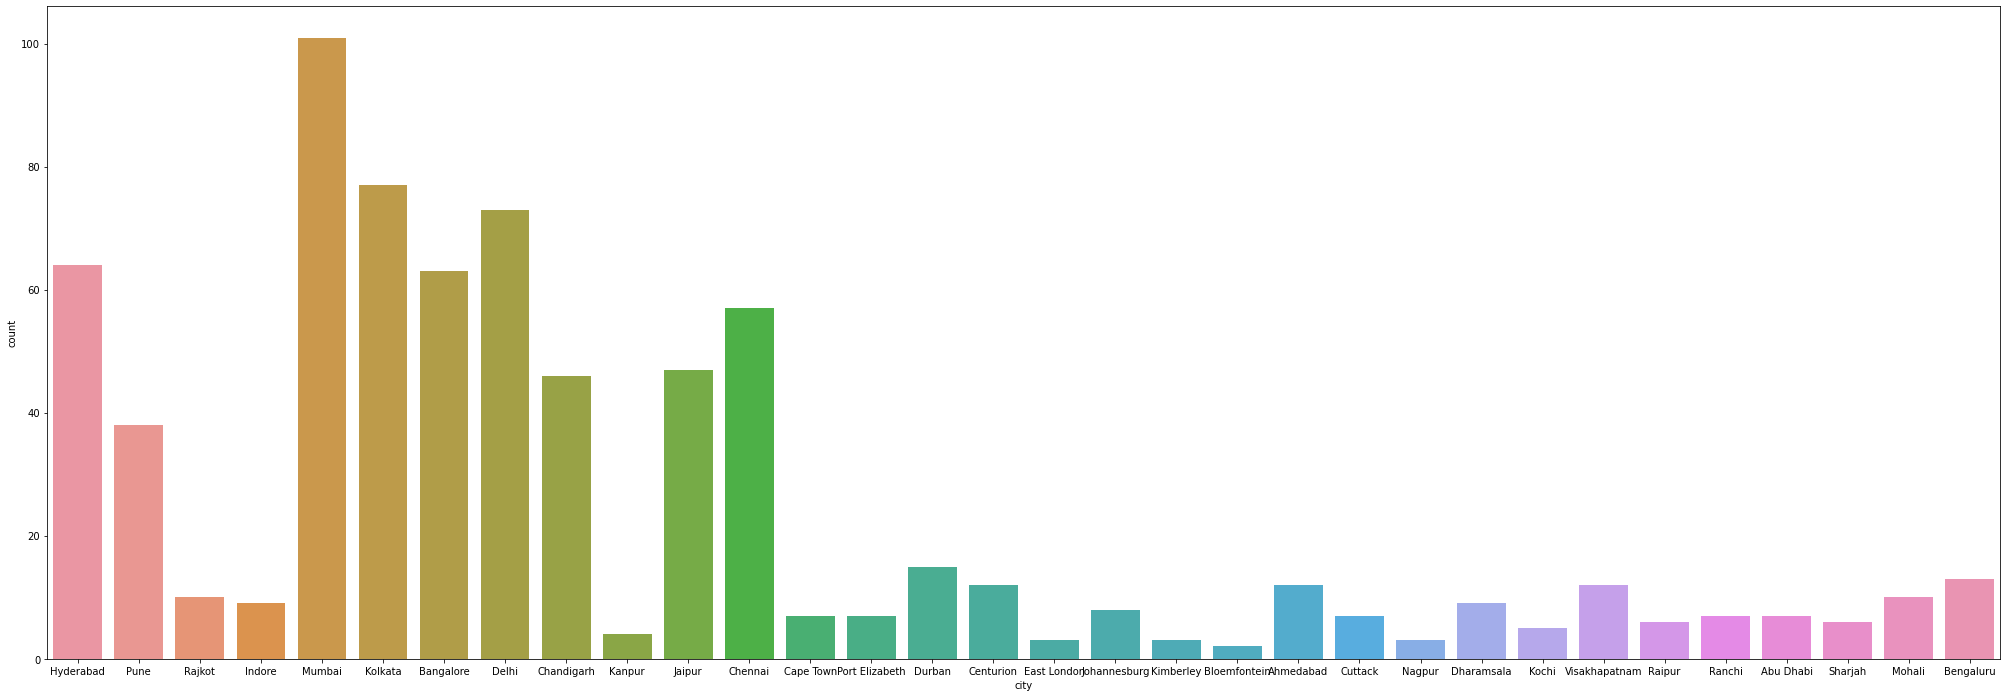

In [31]:
plt.figure(figsize=(35,12))
sns.countplot(data=df_matches, x='city')
plt.show()

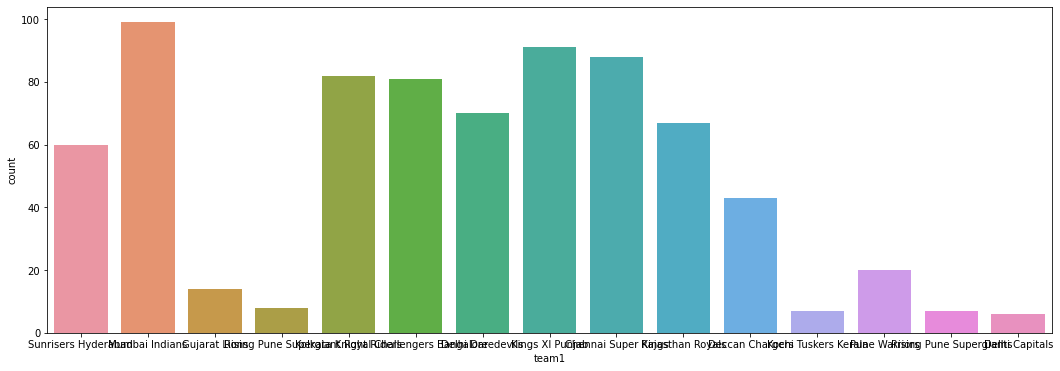

In [32]:
plt.figure(figsize=(18,6))
sns.countplot(data=df_matches, x='team1')
plt.show()

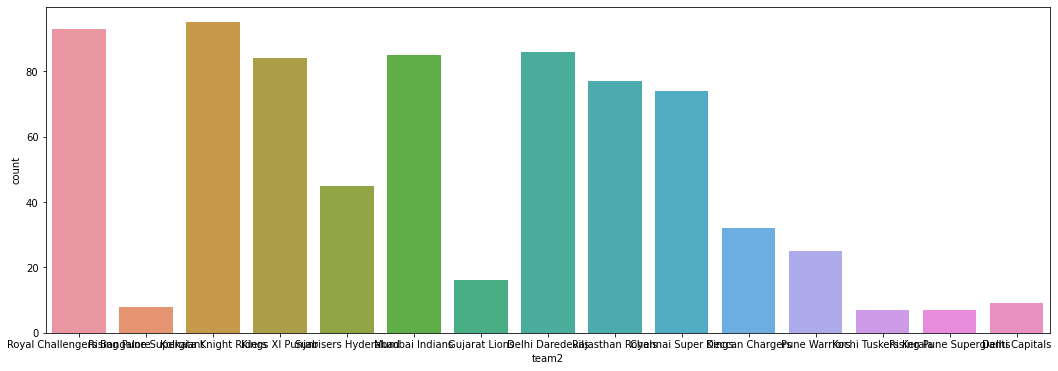

In [33]:
plt.figure(figsize=(18,6))
sns.countplot(data=df_matches, x='team2')
plt.show()

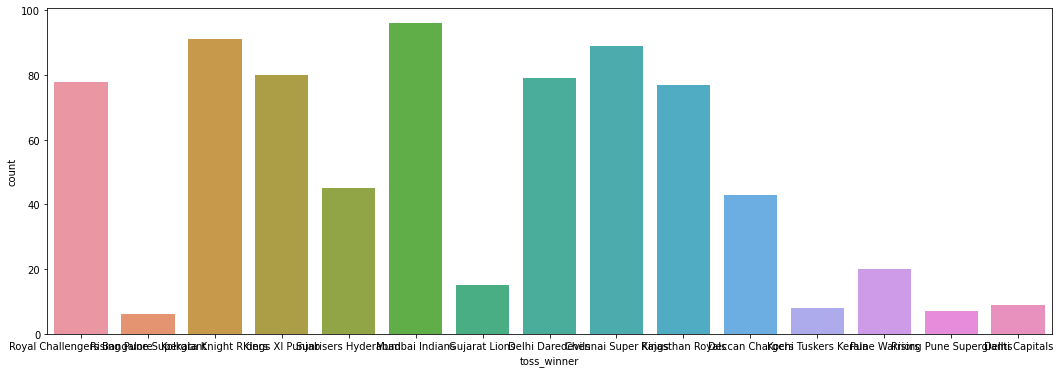

In [34]:
plt.figure(figsize=(18,6))
sns.countplot(data=df_matches, x='toss_winner')
plt.show()

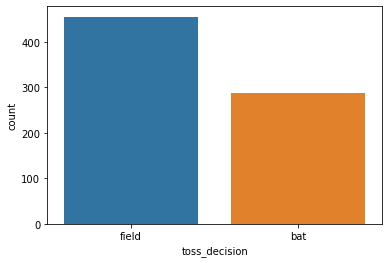

In [35]:
sns.countplot(data=df_matches, x='toss_decision')
plt.show()

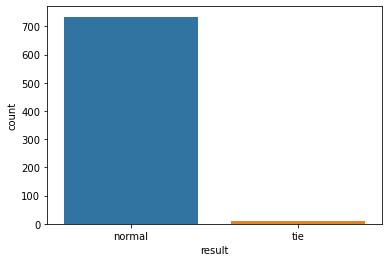

In [36]:
sns.countplot(data=df_matches, x='result')
plt.show()

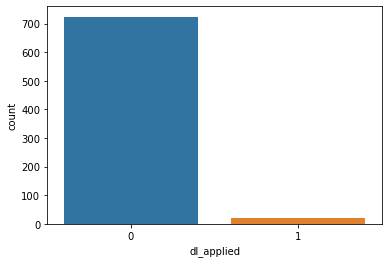

In [37]:
sns.countplot(data=df_matches, x='dl_applied')
plt.show()

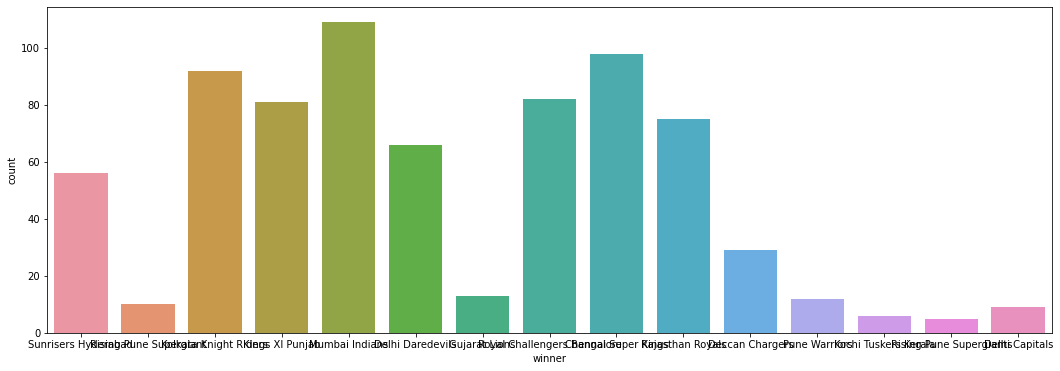

In [38]:
plt.figure(figsize=(18,6))
sns.countplot(data=df_matches, x='winner')
plt.show()

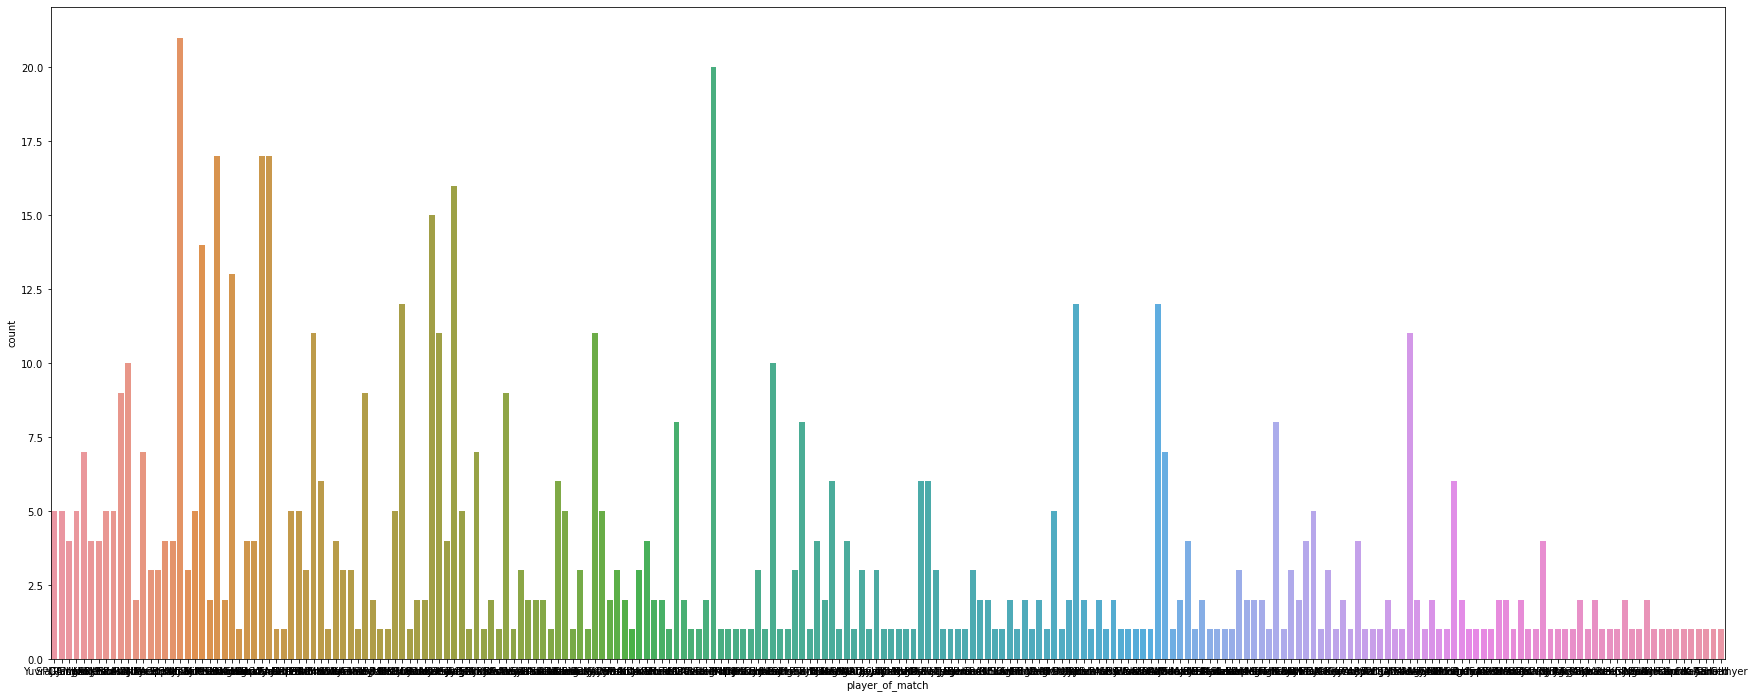

In [39]:
plt.figure(figsize=(30,12))
sns.countplot(data=df_matches, x='player_of_match')
plt.show()

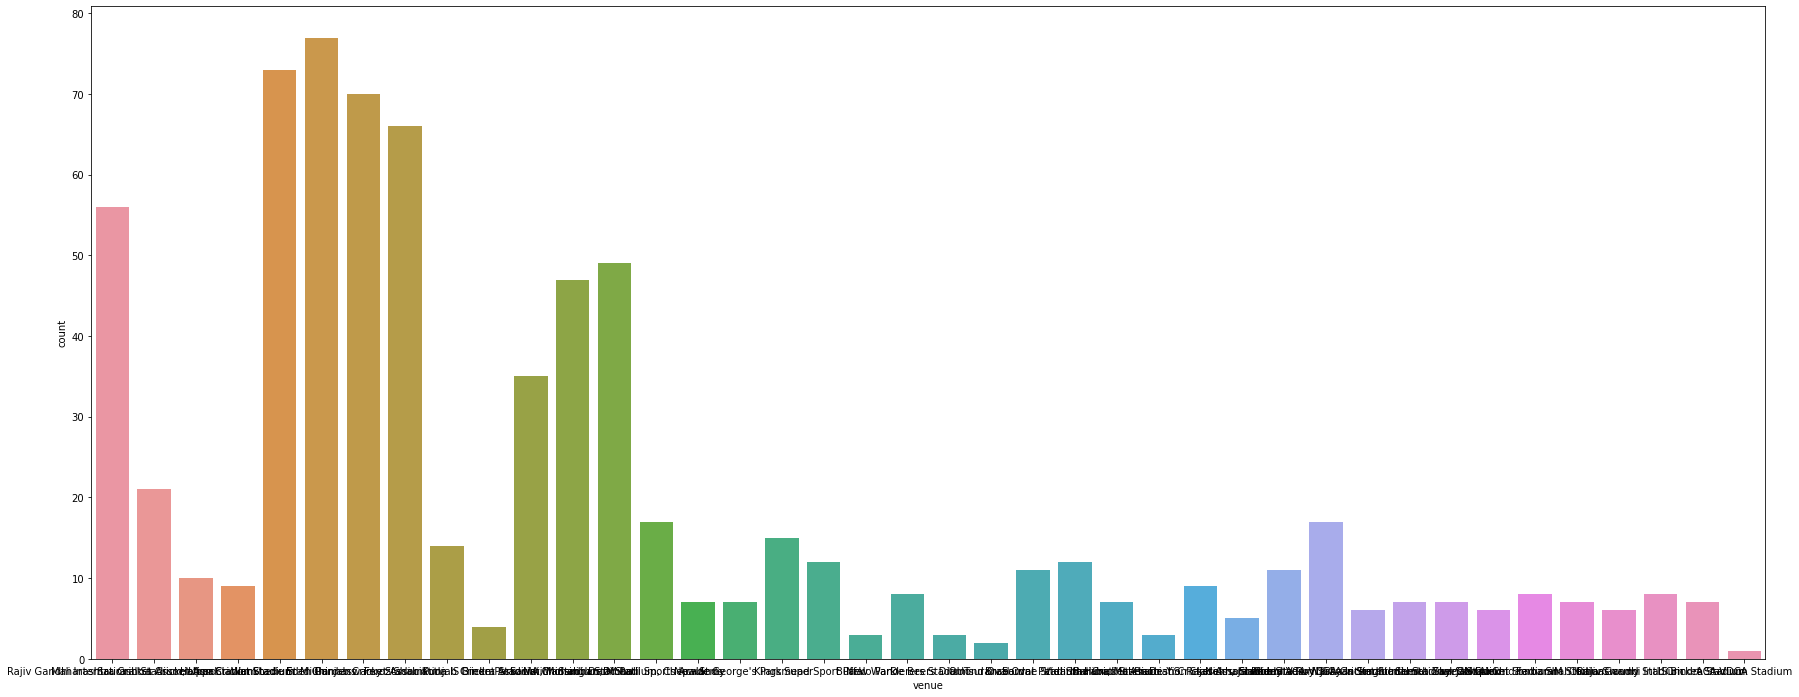

In [40]:
plt.figure(figsize=(30,12))
sns.countplot(data=df_matches, x='venue')
plt.show()

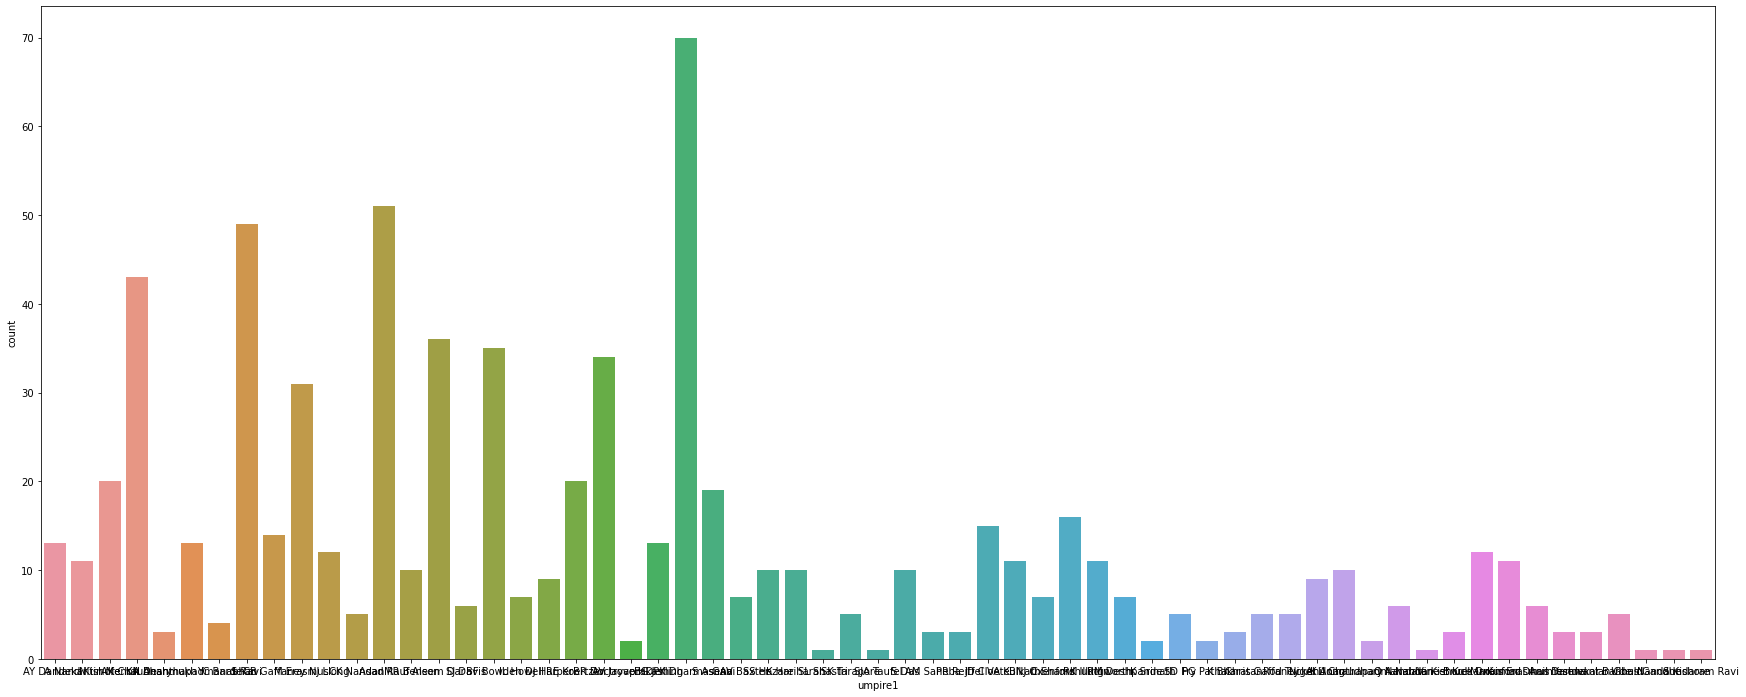

In [41]:
plt.figure(figsize=(30,12))
sns.countplot(data=df_matches, x='umpire1')
plt.show()

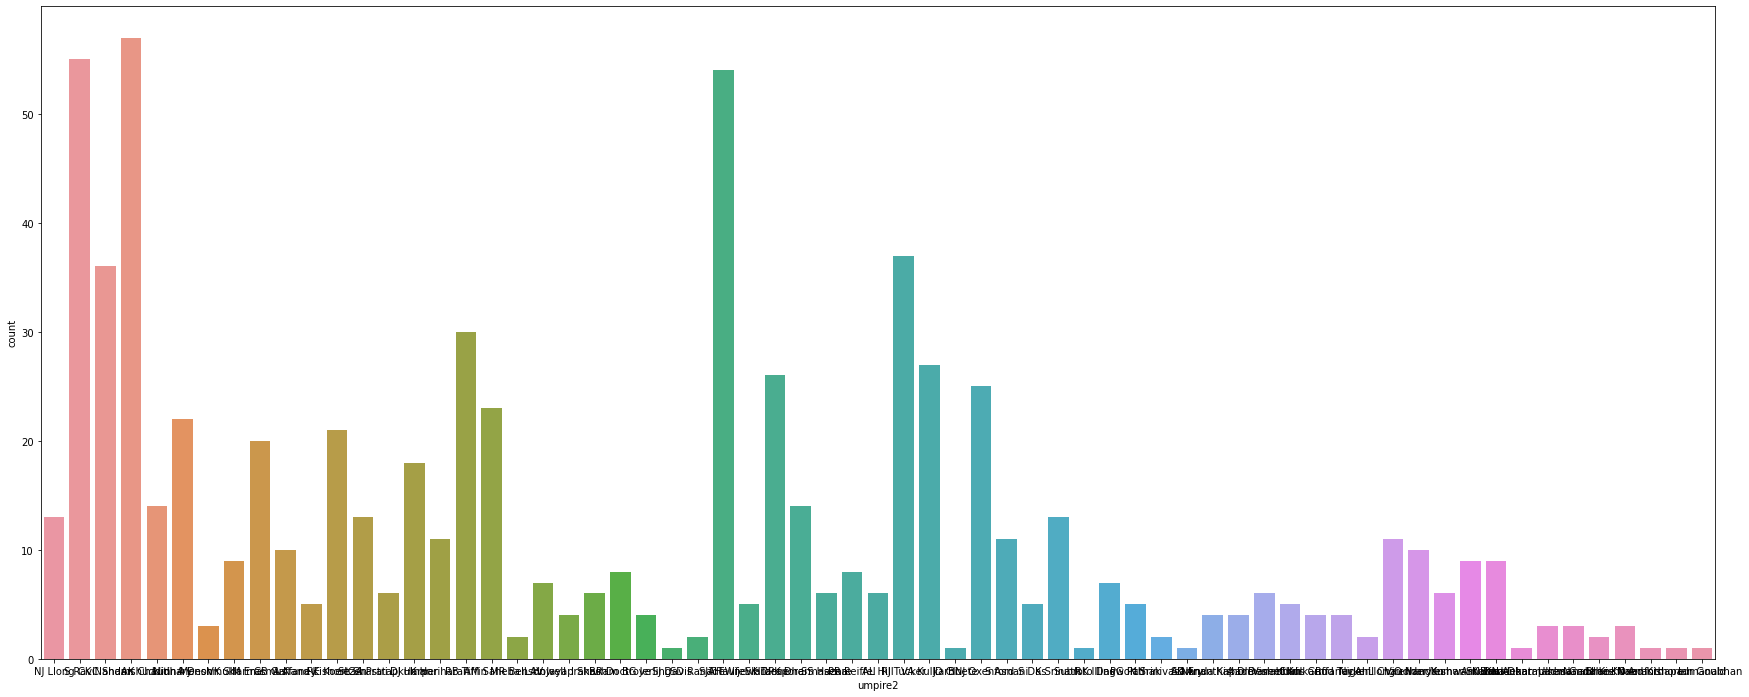

In [42]:
plt.figure(figsize=(30,12))
sns.countplot(data=df_matches, x='umpire2')
plt.show()

<AxesSubplot:ylabel='season'>

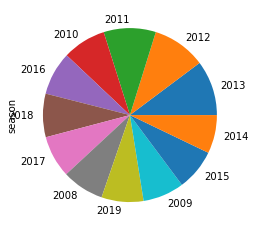

In [43]:
df_matches['season'].value_counts().plot.pie()

<AxesSubplot:ylabel='team1'>

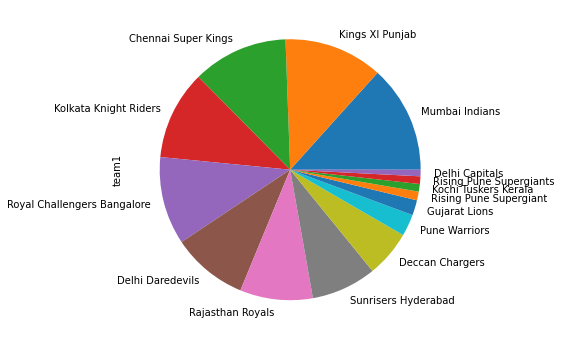

In [45]:
plt.figure(figsize=(6,6))
df_matches['team1'].value_counts().plot.pie()

<AxesSubplot:ylabel='team2'>

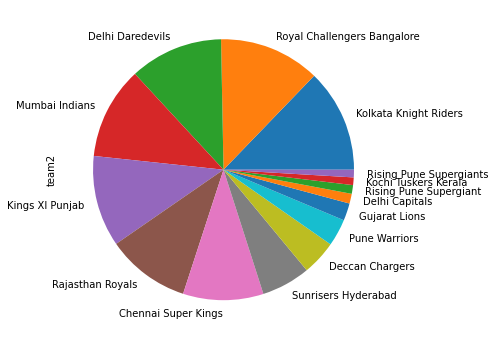

In [47]:
plt.figure(figsize=(6,6))
df_matches['team2'].value_counts().plot.pie()

Bivariate analysis

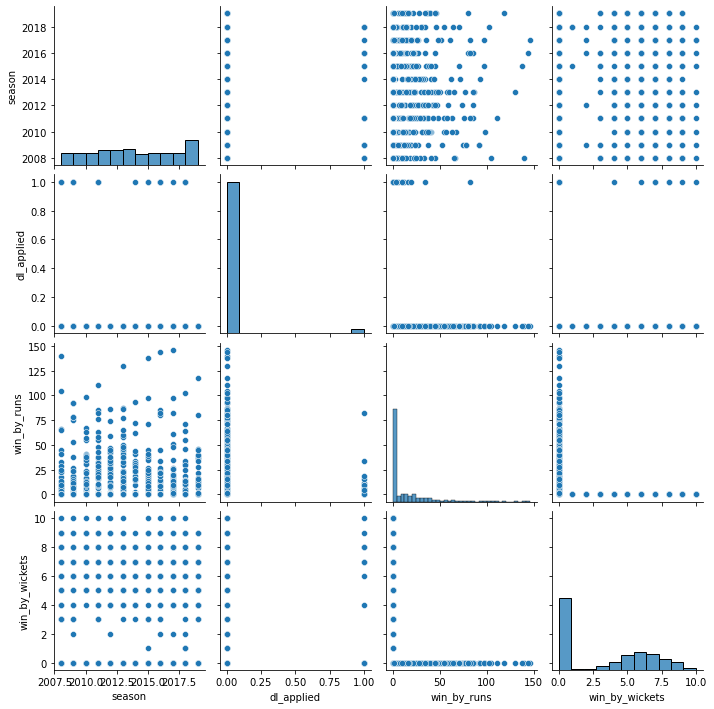

In [48]:
sns.pairplot(df_matches[['season', 'dl_applied', 'win_by_runs', 'win_by_wickets']])

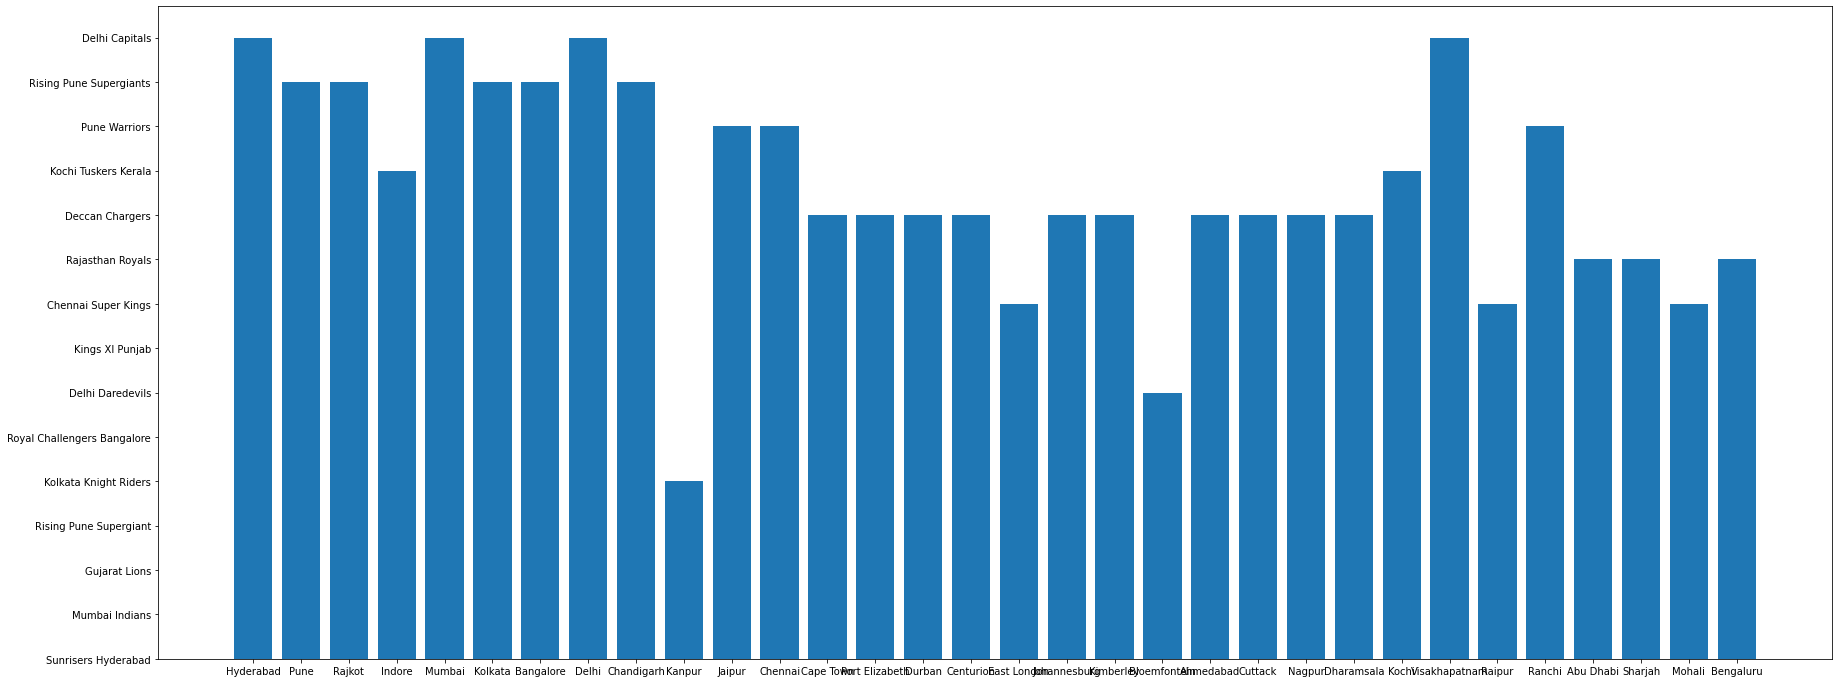

In [50]:
plt.figure(figsize=(30,12))
plt.bar('city','team1', data=df_matches)
plt.show()

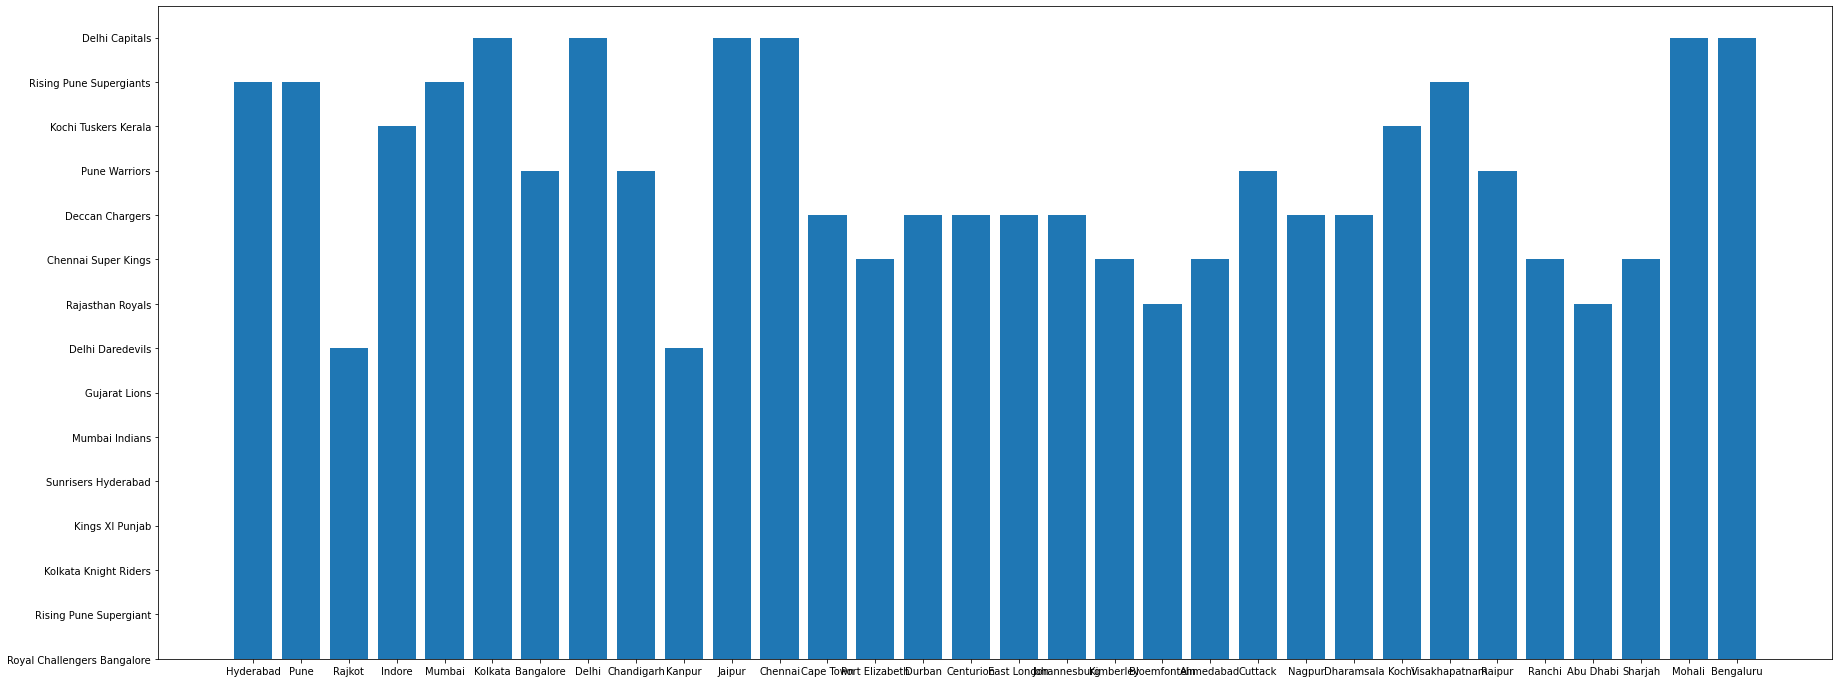

In [51]:
plt.figure(figsize=(30,12))
plt.bar('city','team2', data=df_matches)
plt.show()

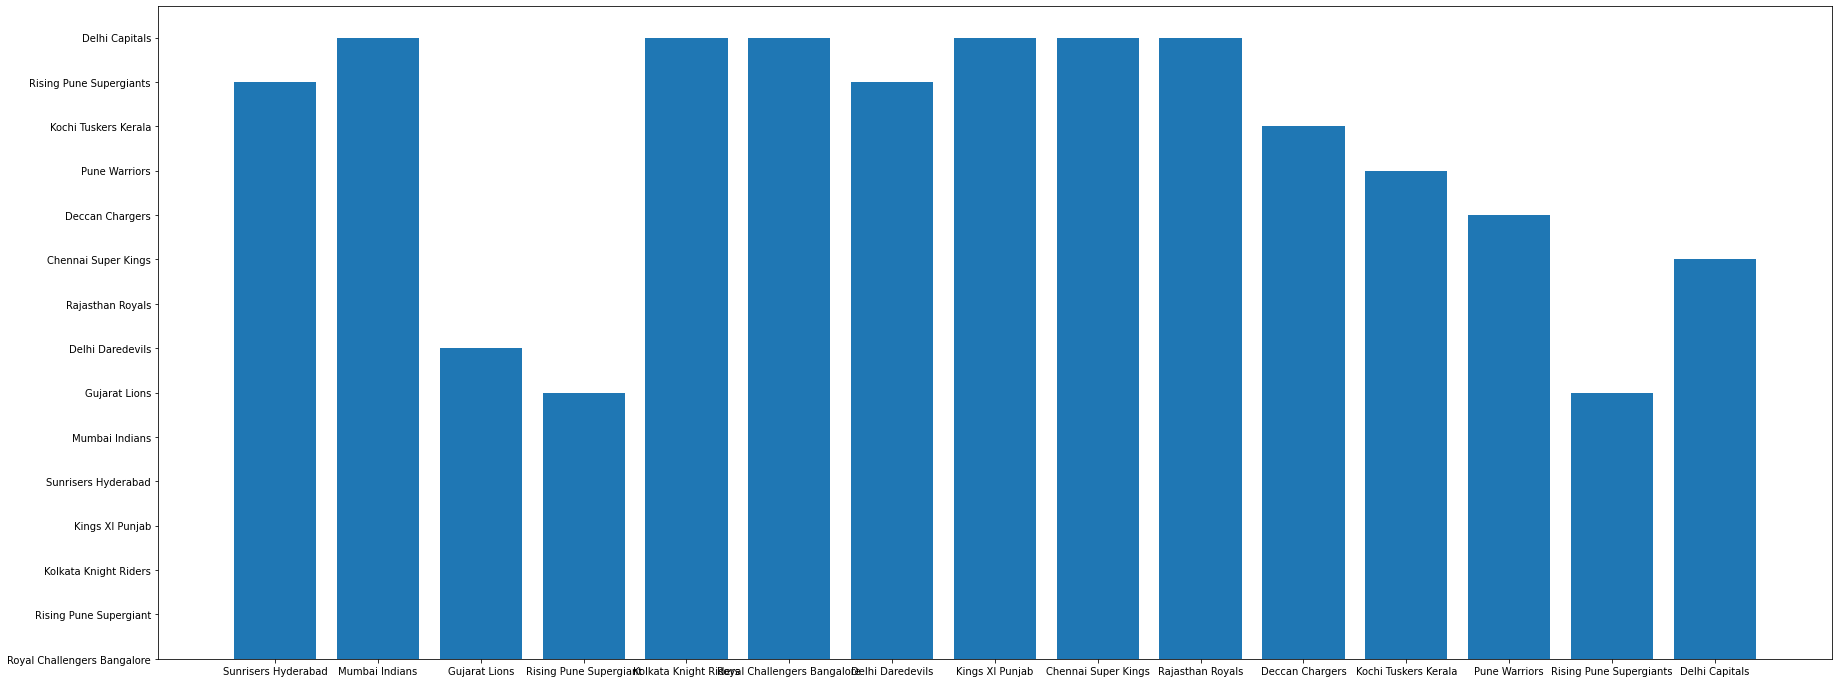

In [52]:
plt.figure(figsize=(30,12))
plt.bar('team1','team2', data=df_matches)
plt.show()

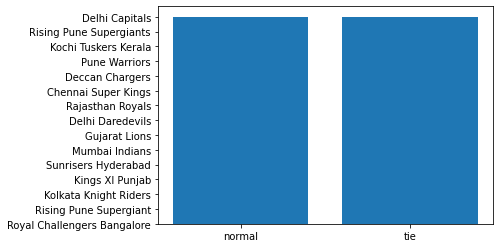

In [53]:
plt.bar('result','team2', data=df_matches)
plt.show()

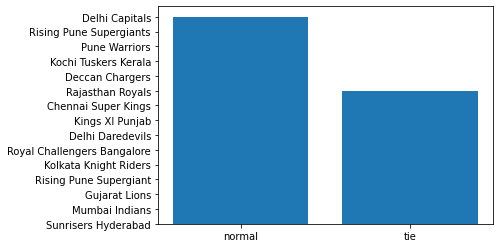

In [54]:
plt.bar('result','team1', data=df_matches)
plt.show()

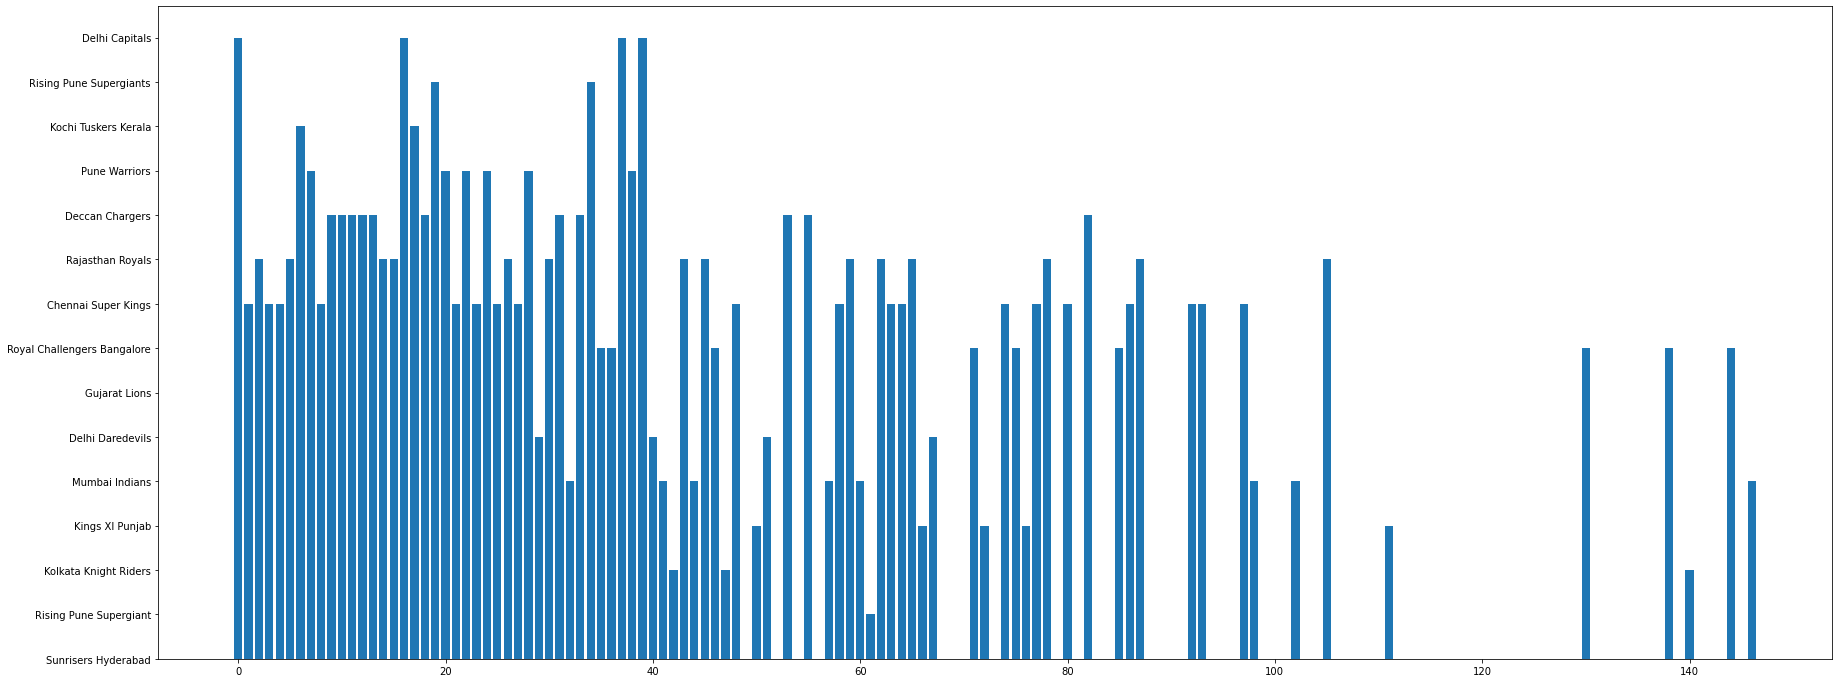

In [55]:
plt.figure(figsize=(30,12))
plt.bar('win_by_runs','winner', data=df_matches)
plt.show()

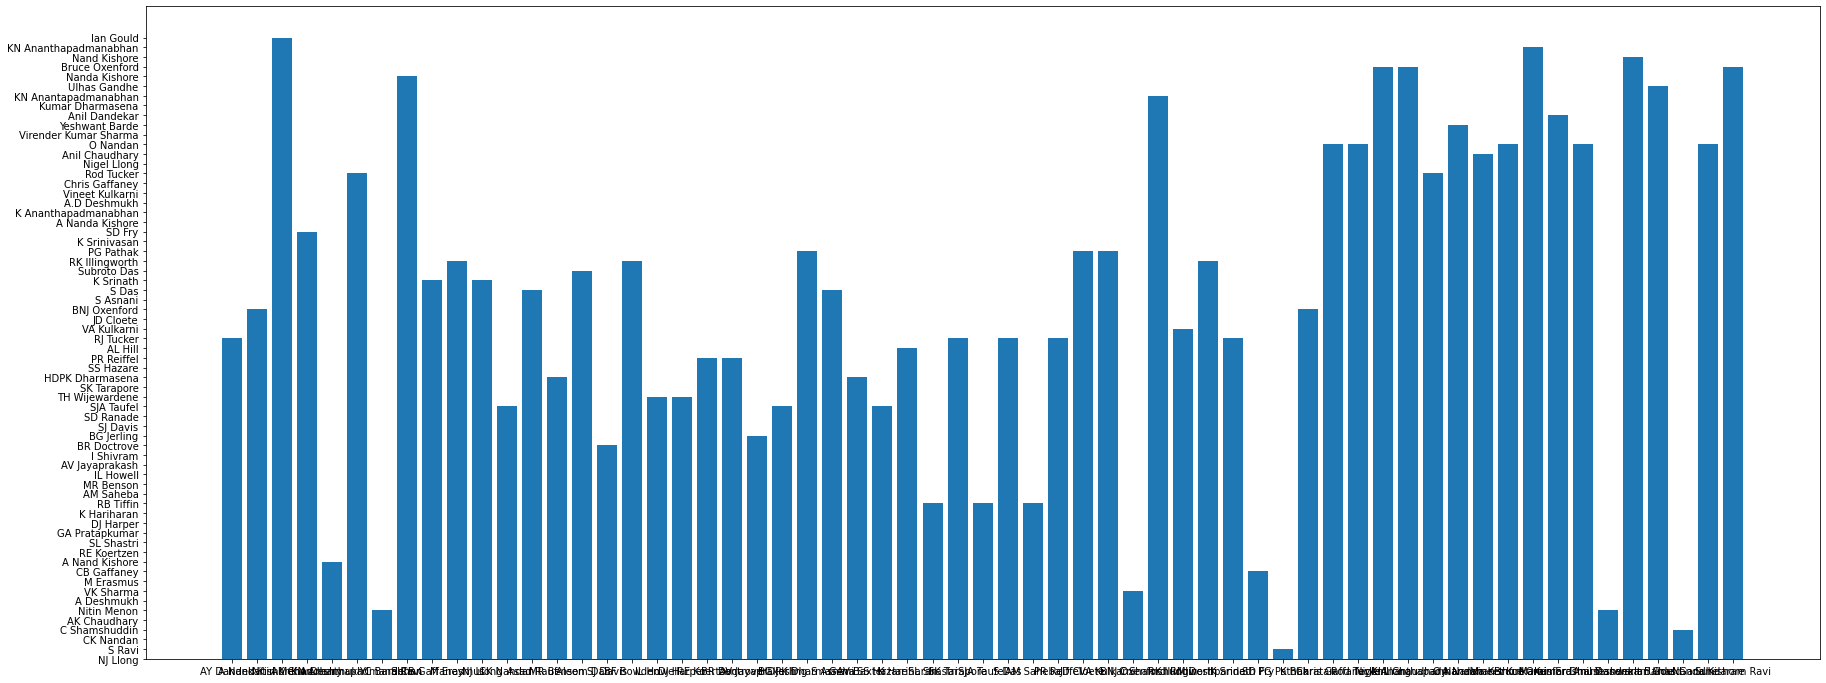

In [56]:
plt.figure(figsize=(30,12))
plt.bar('umpire1','umpire2', data=df_matches)
plt.show()

------------------------------------------------------------------------------------------------------------------------------

<h4>For '' deliveries '' file</h4>

In [57]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


Full summary of the dataframe

In [58]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

Dataset Statistical Information Display

In [59]:
df_deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


Find the fatures dtypes

In [60]:
df_deliveries.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

Shape of the data

In [61]:
df_deliveries.shape

(179078, 21)

Check Null Values

In [62]:
df_deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

the data have too much missing values in the columns **player_dismissed, dismissal_kind, fielder** so we will drop these columns

In [63]:
df_deliveries.drop(columns=['player_dismissed', 'dismissal_kind', 'fielder'], inplace=True)

In [64]:
df_deliveries.isnull().sum()

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

Check Duplications

In [65]:
df_deliveries.duplicated().any()

True

In [66]:
df_deliveries = df_deliveries.drop_duplicates()

In [67]:
df_deliveries.duplicated().any()

False

return Series with number of distinct observations over requested axis

In [68]:
df_deliveries.nunique()

match_id         756
inning             5
batting_team      15
bowling_team      15
over              20
ball               9
batsman          516
non_striker      511
bowler           405
is_super_over      2
wide_runs          6
bye_runs           5
legbye_runs        6
noball_runs        5
penalty_runs       2
batsman_runs       8
extra_runs         7
total_runs        10
dtype: int64

In [69]:
df_deliveries['inning'].value_counts()

1    92726
2    86232
3       50
4       38
5        8
Name: inning, dtype: int64

In [70]:
df_deliveries['batting_team'].value_counts()

Mumbai Indians                 22615
Kings XI Punjab                20929
Royal Challengers Bangalore    20905
Kolkata Knight Riders          20851
Chennai Super Kings            19761
Delhi Daredevils               18786
Rajasthan Royals               17287
Sunrisers Hyderabad            12907
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Delhi Capitals                  1908
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: batting_team, dtype: int64

In [71]:
df_deliveries['bowling_team'].value_counts()

Mumbai Indians                 22516
Royal Challengers Bangalore    21229
Kolkata Knight Riders          20939
Kings XI Punjab                20782
Chennai Super Kings            19548
Delhi Daredevils               18724
Rajasthan Royals               17378
Sunrisers Hyderabad            12778
Deccan Chargers                 9039
Pune Warriors                   5457
Gujarat Lions                   3545
Delhi Capitals                  1962
Rising Pune Supergiant          1928
Rising Pune Supergiants         1615
Kochi Tuskers Kerala            1614
Name: bowling_team, dtype: int64

In [72]:
df_deliveries['over'].value_counts()

1     9601
2     9497
3     9412
4     9372
5     9344
6     9325
7     9283
8     9253
9     9230
10    9182
11    9120
12    9090
13    9071
14    8977
15    8899
16    8761
17    8647
18    8387
19    7865
20    6738
Name: over, dtype: int64

In [73]:
df_deliveries['ball'].value_counts()

1    29039
2    28961
3    28878
4    28810
5    28718
6    28620
7     5112
8      794
9      122
Name: ball, dtype: int64

In [74]:
df_deliveries['batsman'].value_counts()

V Kohli          4211
SK Raina         4044
RG Sharma        3816
S Dhawan         3775
G Gambhir        3524
                 ... 
K Ahmed             1
U Kaul              1
DP Vijaykumar       1
P Raj               1
LH Ferguson         1
Name: batsman, Length: 516, dtype: int64

In [75]:
df_deliveries['non_striker'].value_counts()

SK Raina            4173
S Dhawan            4090
V Kohli             4070
RG Sharma           3857
G Gambhir           3740
                    ... 
VRV Singh              2
S Randiv               1
BW Hilfenhaus          1
TP Sudhindra           1
PM Sarvesh Kumar       1
Name: non_striker, Length: 511, dtype: int64

In [76]:
df_deliveries['bowler'].value_counts()

Harbhajan Singh     3451
A Mishra            3172
PP Chawla           3157
R Ashwin            3016
SL Malinga          2974
                    ... 
Y Gnaneswara Rao       6
P Prasanth             6
SPD Smith              2
SN Khan                2
AC Gilchrist           1
Name: bowler, Length: 405, dtype: int64

In [77]:
df_deliveries['is_super_over'].value_counts()

0    178973
1        81
Name: is_super_over, dtype: int64

In [78]:
df_deliveries['wide_runs'].value_counts()

0    173649
1      4915
2       230
5       208
3        47
4         5
Name: wide_runs, dtype: int64

In [79]:
df_deliveries['bye_runs'].value_counts()

0    178574
1       324
4       123
2        31
3         2
Name: bye_runs, dtype: int64

In [80]:
df_deliveries['legbye_runs'].value_counts()

0    176118
1      2557
4       220
2       138
3        17
5         4
Name: legbye_runs, dtype: int64

In [81]:
df_deliveries['noball_runs'].value_counts()

0    178340
1       698
2         9
5         6
3         1
Name: noball_runs, dtype: int64

In [82]:
df_deliveries['penalty_runs'].value_counts()

0    179052
5         2
Name: penalty_runs, dtype: int64

In [83]:
df_deliveries['batsman_runs'].value_counts()

0    70835
1    67511
4    20390
2    11471
6     8170
3      587
5       79
7       11
Name: batsman_runs, dtype: int64

In [84]:
df_deliveries['extra_runs'].value_counts()

0    169518
1      8494
2       407
4       348
5       219
3        67
7         1
Name: extra_runs, dtype: int64

In [85]:
df_deliveries['total_runs'].value_counts()

1     73048
0     62992
4     20597
2     13124
6      8148
3       688
5       339
8        64
7        38
10       16
Name: total_runs, dtype: int64

**Visualizations**

Univariate Analysis

>Check outliers

<AxesSubplot:xlabel='inning'>

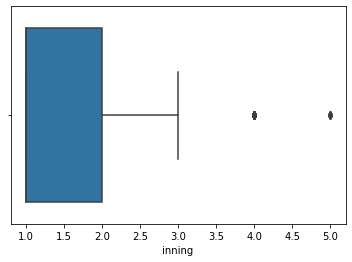

In [86]:
sns.boxplot(df_deliveries['inning'])

<AxesSubplot:xlabel='over'>

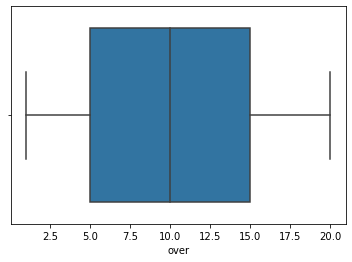

In [87]:
sns.boxplot(df_deliveries['over'])

<AxesSubplot:xlabel='ball'>

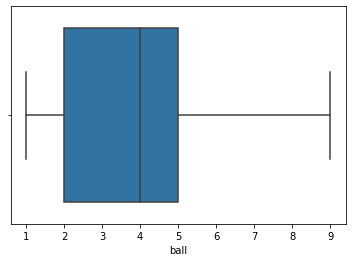

In [88]:
sns.boxplot(df_deliveries['ball'])

<AxesSubplot:xlabel='ball', ylabel='Density'>

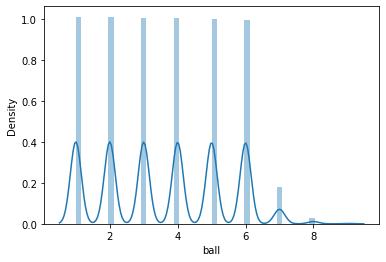

In [89]:
sns.distplot(df_deliveries['ball'])

<AxesSubplot:xlabel='over', ylabel='Density'>

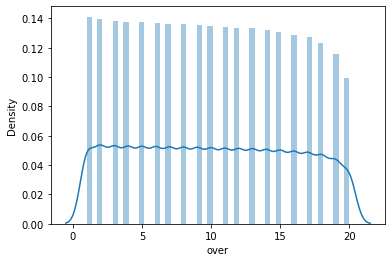

In [90]:
sns.distplot(df_deliveries['over'])

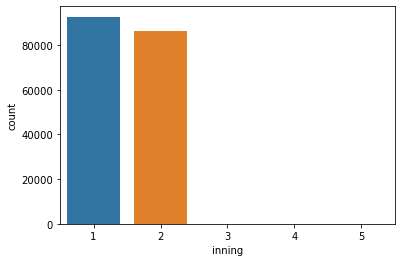

In [91]:
sns.countplot(data=df_deliveries, x='inning')
plt.show()

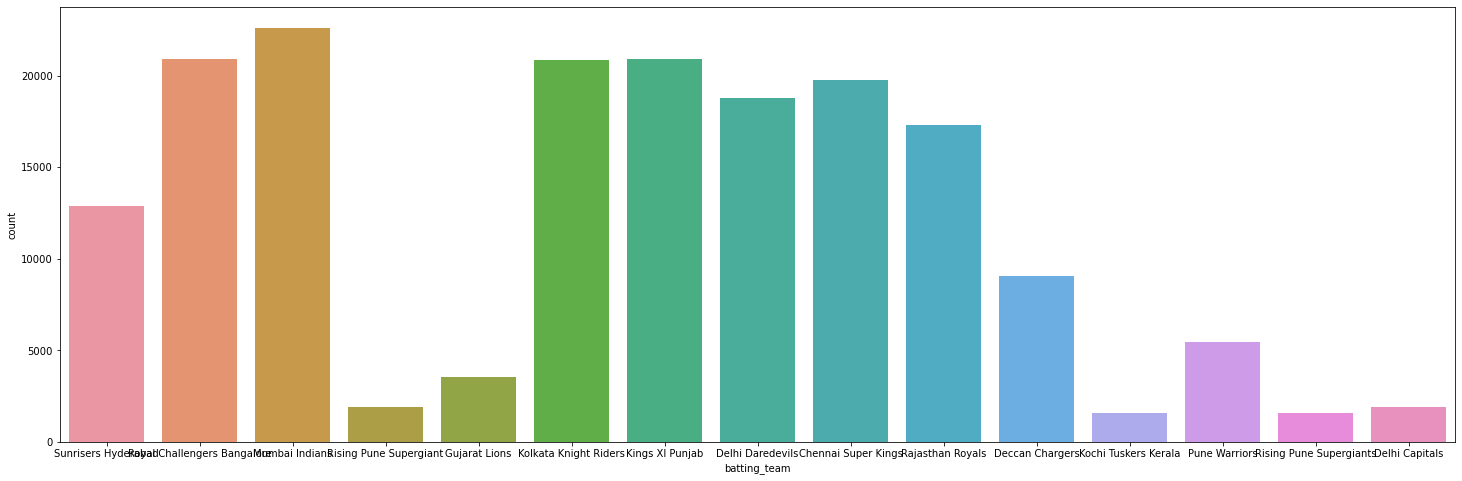

In [94]:
plt.figure(figsize=(25,8))
sns.countplot(data=df_deliveries, x='batting_team')
plt.show()

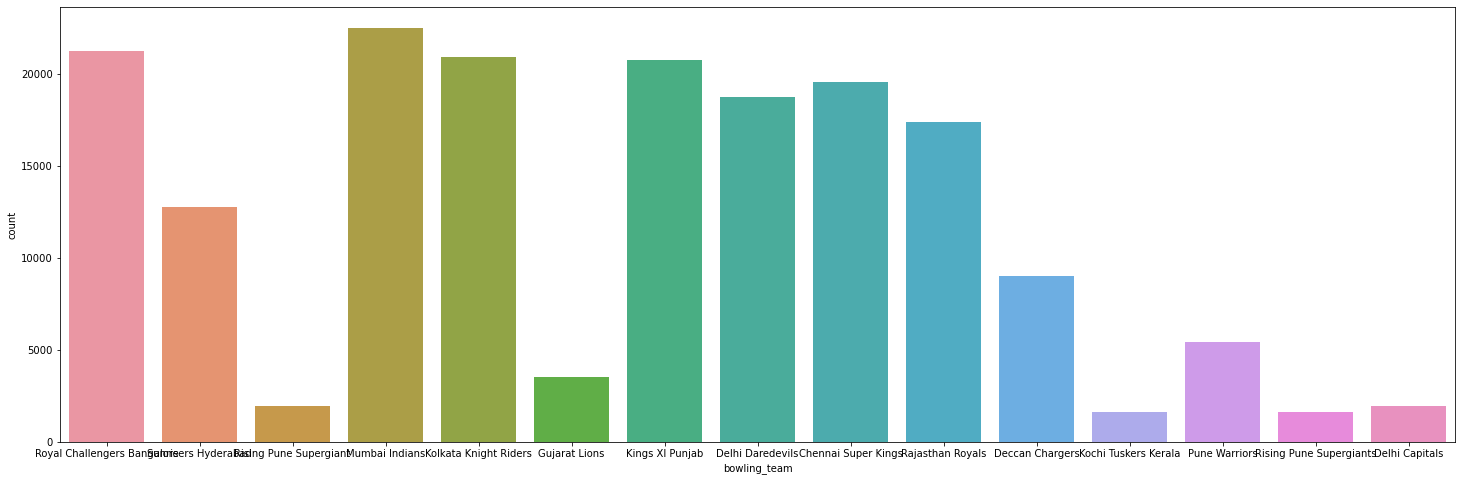

In [95]:
plt.figure(figsize=(25,8))
sns.countplot(data=df_deliveries, x='bowling_team')
plt.show()

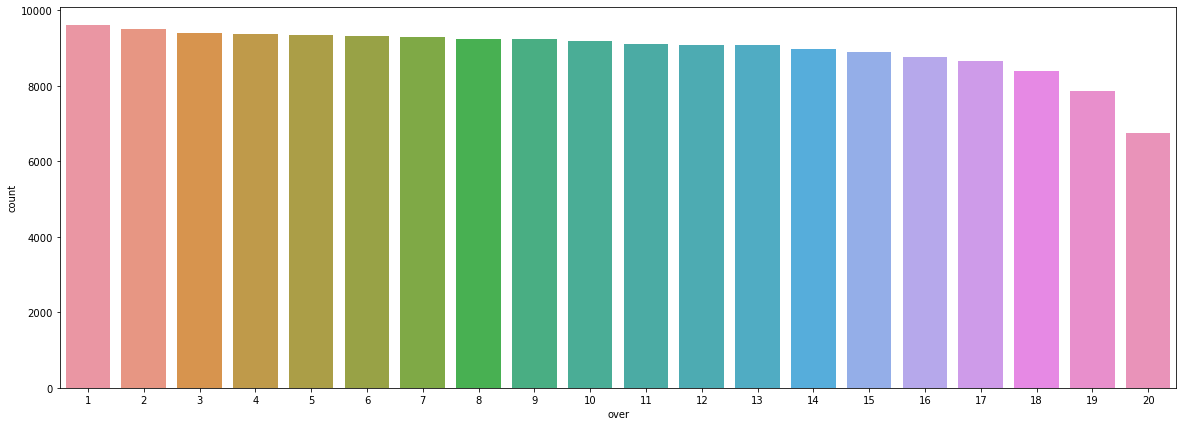

In [96]:
plt.figure(figsize=(20,7))
sns.countplot(data=df_deliveries, x='over')
plt.show()

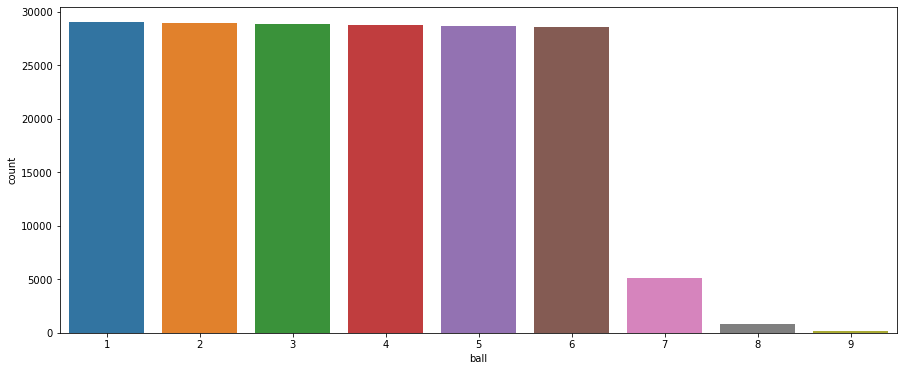

In [97]:
plt.figure(figsize=(15,6))
sns.countplot(data=df_deliveries, x='ball')
plt.show()

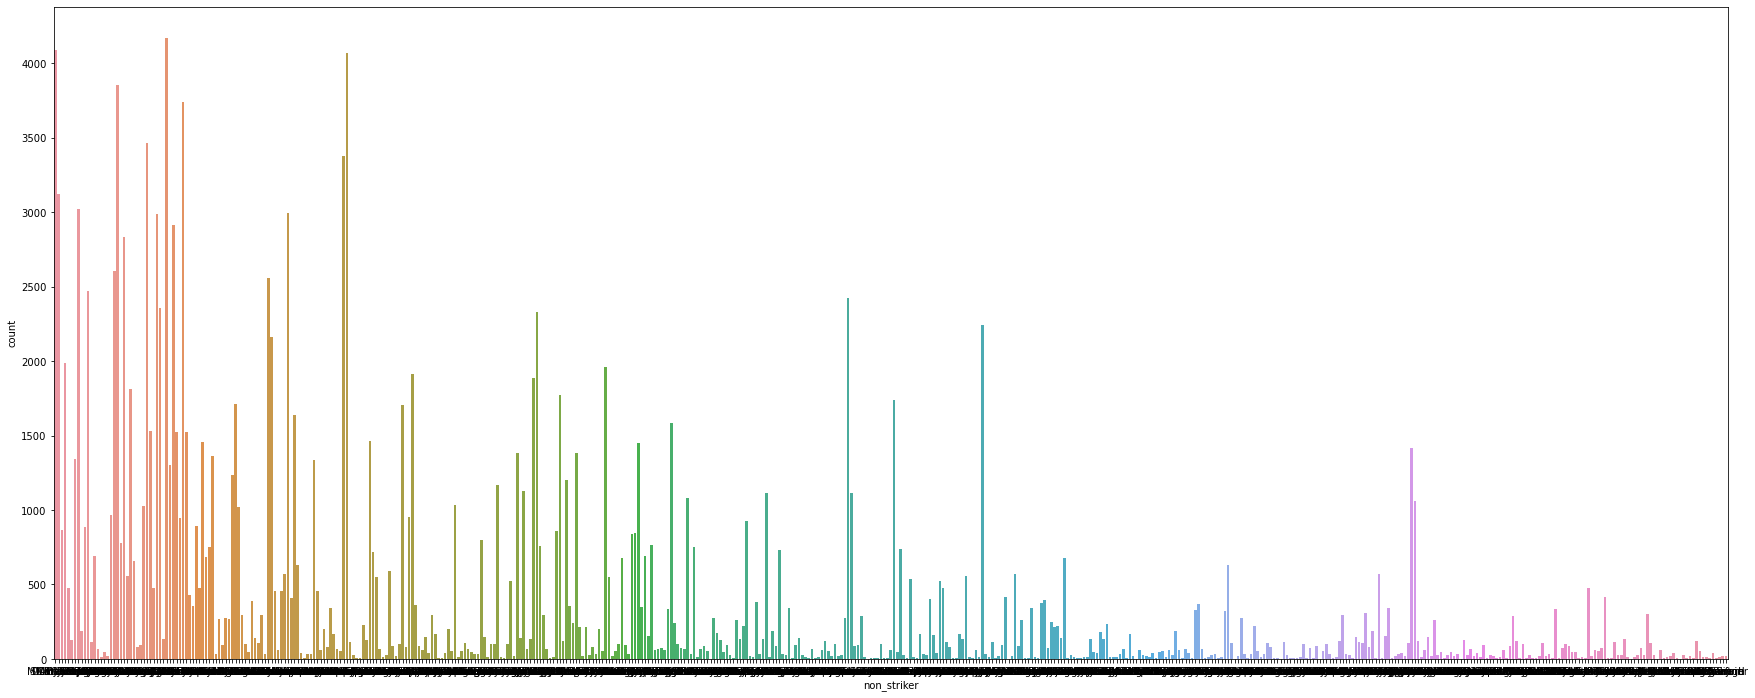

In [98]:
plt.figure(figsize=(30,12))
sns.countplot(data=df_deliveries, x='non_striker')
plt.show()

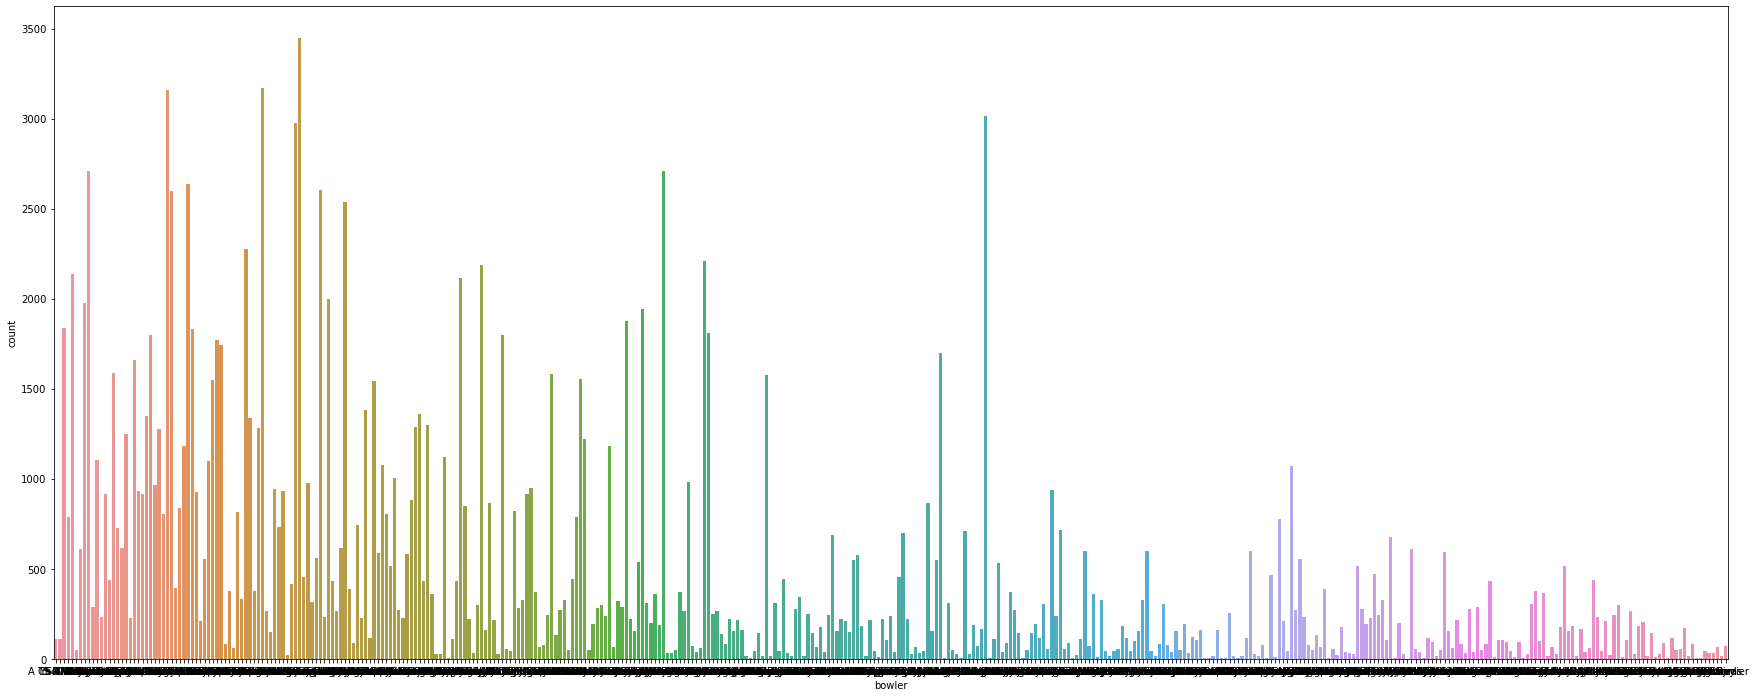

In [99]:
plt.figure(figsize=(30,12))
sns.countplot(data=df_deliveries, x='bowler')
plt.show()

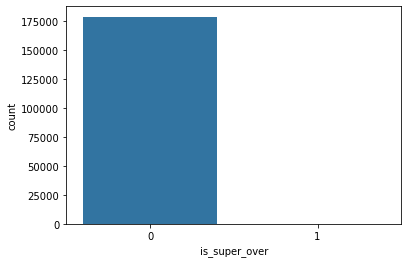

In [100]:
sns.countplot(data=df_deliveries, x='is_super_over')
plt.show()

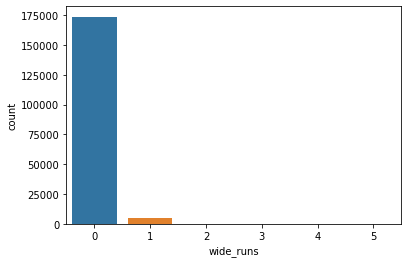

In [101]:
sns.countplot(data=df_deliveries, x='wide_runs')
plt.show()

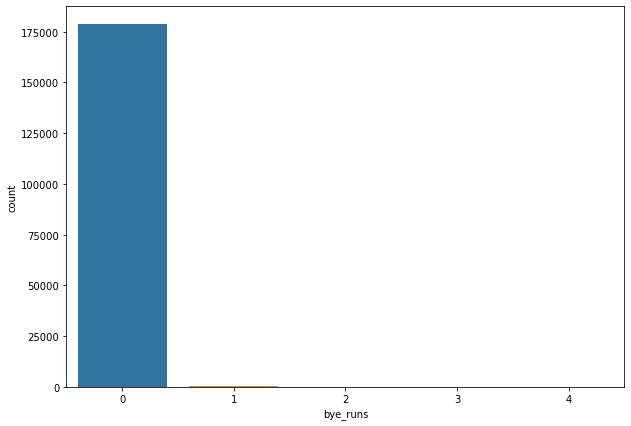

In [103]:
plt.figure(figsize=(10,7))
sns.countplot(data=df_deliveries, x='bye_runs')
plt.show()

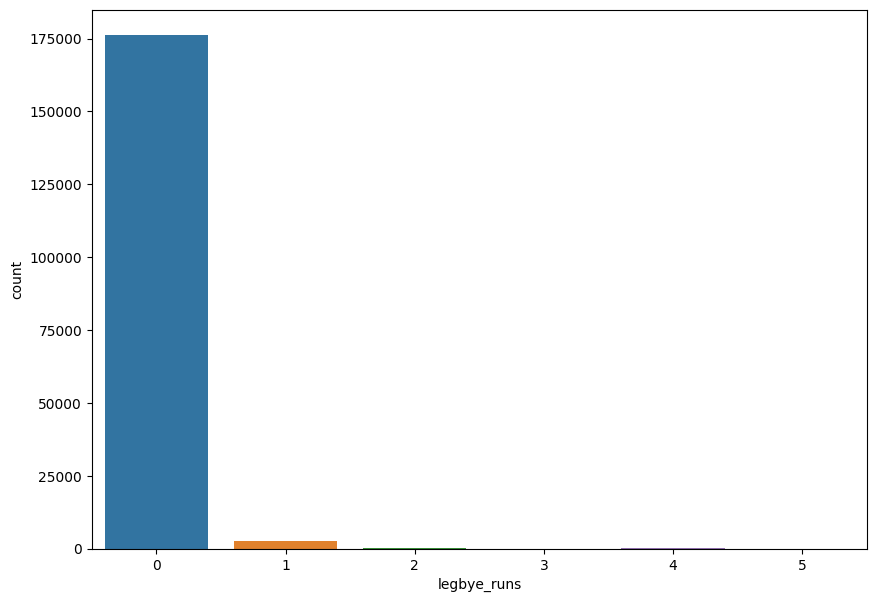

In [98]:
plt.figure(figsize=(10,7))
sns.countplot(data=df_deliveries, x='legbye_runs')
plt.show()

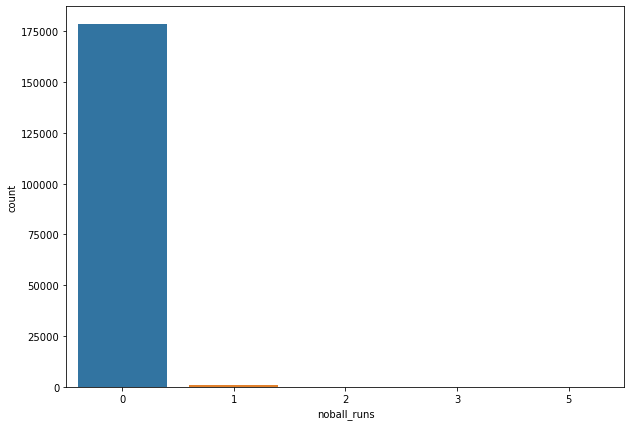

In [104]:
plt.figure(figsize=(10,7))
sns.countplot(data=df_deliveries, x='noball_runs')
plt.show()

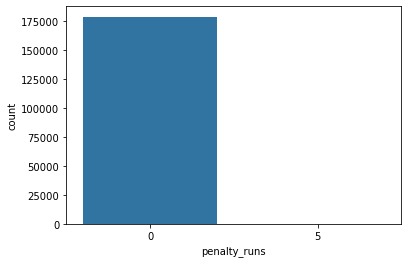

In [105]:
sns.countplot(data=df_deliveries, x='penalty_runs')
plt.show()

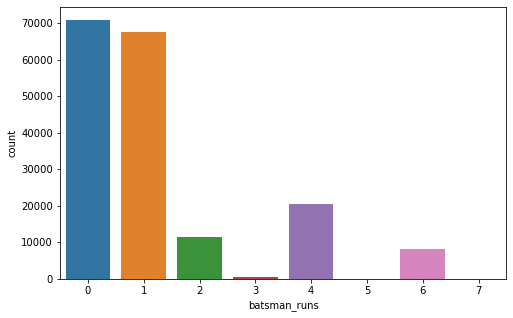

In [106]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_deliveries, x='batsman_runs')
plt.show()

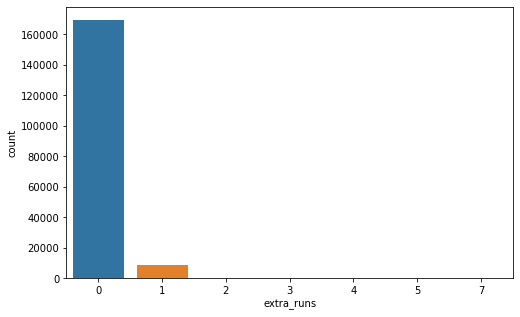

In [107]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_deliveries, x='extra_runs')
plt.show()

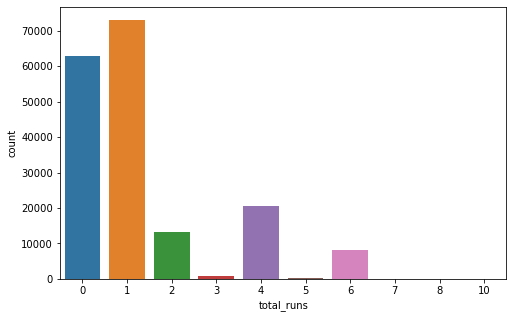

In [108]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_deliveries, x='total_runs')
plt.show()

<AxesSubplot:ylabel='batting_team'>

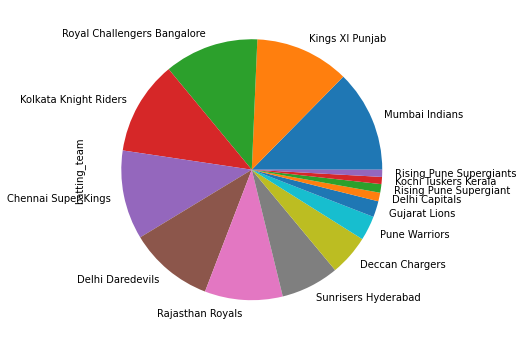

In [109]:
plt.figure(figsize=(6,6))
df_deliveries['batting_team'].value_counts().plot.pie()

<AxesSubplot:ylabel='bowling_team'>

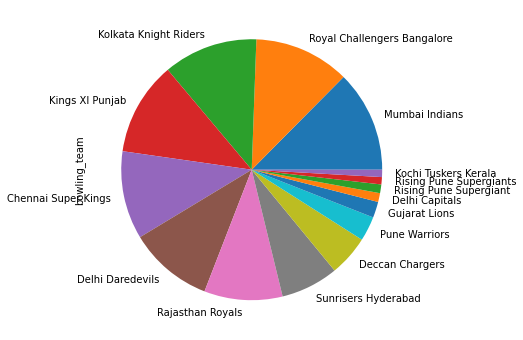

In [110]:
plt.figure(figsize=(6,6))
df_deliveries['bowling_team'].value_counts().plot.pie()

<AxesSubplot:ylabel='over'>

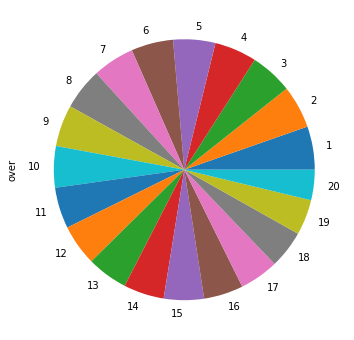

In [111]:
plt.figure(figsize=(6,6))
df_deliveries['over'].value_counts().plot.pie()

<AxesSubplot:ylabel='ball'>

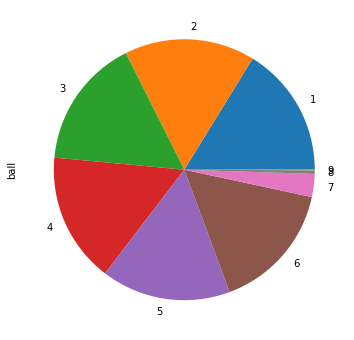

In [112]:
plt.figure(figsize=(6,6))
df_deliveries['ball'].value_counts().plot.pie()

>Bivariate Analysis

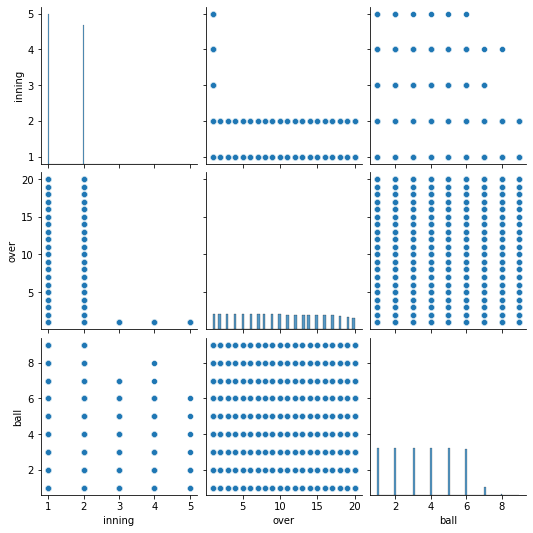

In [113]:
sns.pairplot(df_deliveries[['inning', 'over', 'ball']])

------------------------------------------------------------------------------------------------------------------------------------------------

**Marge the Two Datasets**

In [114]:
df = pd.merge(df_matches, df_deliveries, left_on='id', right_on='match_id')

EDA on the marged dataset

In [115]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,TS Mills,0,0,0,0,0,0,0,0,0
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,TS Mills,0,0,0,0,0,0,0,0,0
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,TS Mills,0,0,0,0,0,0,4,0,4
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,TS Mills,0,0,0,0,0,0,0,0,0
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,TS Mills,0,2,0,0,0,0,0,2,2


Shape of the data

In [116]:
df.shape

(176482, 35)

<AxesSubplot:xlabel='city'>

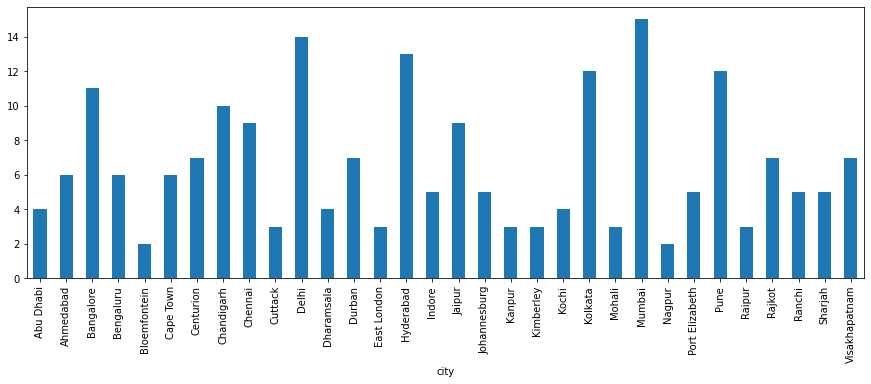

In [117]:
plt.figure(figsize=(30,12))
new_df = df_matches.groupby('city')['winner'].nunique().plot(kind='bar',figsize=(15,5))
new_df